# Present Values - Future Values
**Present Value**: If you have some promised values in the future, how much it worths today?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/anh.dang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## PV
**Example:** You get the payback of lottery of `$50,000` every years in 20 years. The `$50k` belongs further in the future is less valuable.
The graph shows that the value declines by time (when bringing back to PV)

In [15]:
C = 50000
T = 20
r = 0.05

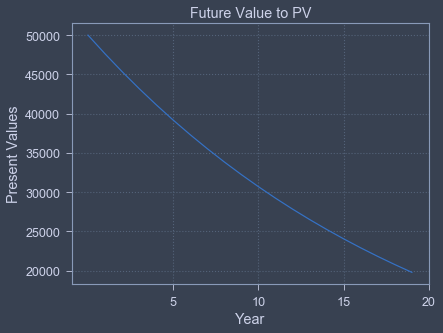

In [21]:
cashflows = np.ones(T)*C 
for year in range(T):
    cashflows[year] = cashflows[year] / ((1+r)**year)
## plot
plt.plot(cashflows)
plt.xticks([5,10,15,20]) 
plt.title('Future Value to PV')
plt.xlabel('Year')
plt.ylabel('Present Values')
plt.grid(linestyle=':');

In [17]:
cashflows.sum() ## actually PV of the cashflow

654266.042983349

## FV
We first simulate a determistic progress that the return is fixed and certain

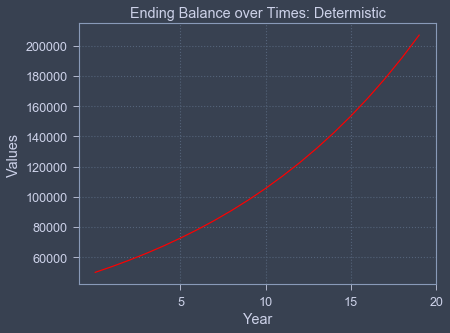

In [27]:
cashflows = np.ones(T)*C 
for year in range(T):
    cashflows[year] = cashflows[year] * ((1+r)**year)
## plot
plt.plot(cashflows, color='red')
plt.xticks([5,10,15,20]) 
plt.title('Ending Balance over Times: Determistic')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(linestyle=':');

We now assume that it is actually have some randome shocks.

In [28]:
## Assume that the return in market is average around 9.5%, with the std. deviation 1.85%
np.random.normal(0.095, .0185)

0.05977782246603643

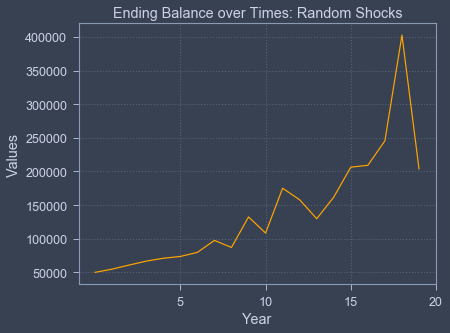

In [31]:
cashflows = np.ones(T)*C 
for year in range(T):
    r = np.random.normal(0.095, .0185)
    cashflows[year] = cashflows[year] * ((1+r)**year)
## plot
plt.plot(cashflows, color='orange')
plt.xticks([5,10,15,20]) 
plt.title('Ending Balance over Times: Random Shocks')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(linestyle=':');

## NPV - IRR
1. To compute the value of the projects (the return of initial investment) or a stream of cashflow.
2. **IRR**: the rate at which NPV is zero
3. As long as the cost of capital (discounted rate) < IRR, the NPV > 0

In [93]:
initial_investment = 100000
cost_of_captial = 0.12 ## rate 
years = np.arange(1,6)
cashflows = np.ones(5)*30000 

In [94]:
cashflows_discounted = cashflows / (1+cost_of_captial)**years ## discounted the cashflow to PV
npv1 = cashflows_discounted.sum() - initial_investment ## substract to the initial investment
## Try with the npv function in Numpy
cf_values = list(cashflows)
cf_values.insert(0,-initial_investment)
npv2 = np.npv(rate=cost_of_captial, values=cf_values)
## IRR
irr_rate = np.irr(cf_values)
npv_at_irr = np.npv(irr_rate, cf_values)

In [95]:
print('Net Present Value is {:,.2f}'.format(npv))
print('NPV by Numpy: {:,.2f}'.format(npv2))
print('When NPV is {:,.2f}, the cost of capital equals the IRR {:.2f}'.format(npv_at_irr, irr_rate))

Net Present Value is 8,143.29
NPV by Numpy: 8,143.29
When NPV is 0.00, the cost of capital equals the IRR 0.15


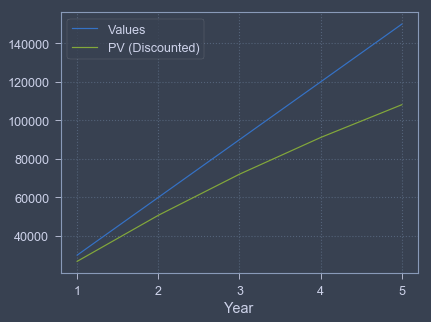

In [96]:
plt.plot(years,cashflows.cumsum(),label='Values')
plt.plot(years,cashflows_discounted.cumsum(), label='PV (Discounted)')
plt.grid(linestyle=':')
plt.xticks(np.arange(1,6))
plt.xlabel('Year')
plt.legend();

# Amortization
Associated with a long term debt (mortgage loans), it contains:
* Loan Balance
* Interest
* Principal Payment over the life of a loan

## Basic Case

In [104]:
## Variables 
pv = 360000 ## loan values of today, that borrower gets
rate = 0.05875 ## interest rate annually
term = 30 ## payback in 30 years
pmt = np.pmt(rate/12, term*12, -pv) ## monthly repayment

In [108]:
## Amortization Table
amort_table = pd.DataFrame({'Balance': np.zeros(term*12+1),
                           'Interest': np.zeros(term*12+1),
                           'Principal': np.zeros(term*12+1),
                           'Cum_Int': np.zeros(term*12+1)})
## Fill in the table
amort_table['Balance'][0] = pv
amort_table['Interest'][0] = amort_table['Balance'][0]*rate/12 
amort_table['Principal'][0] = pmt - amort_table['Interest'][0]
amort_table['Cum_Int'] = amort_table['Interest'].cumsum()

## Loops through the period
for t in range(1, 360):
    amort_table['Balance'][t] = amort_table['Balance'][t-1] - amort_table['Principal'][t-1]
    amort_table['Interest'][t] = amort_table['Balance'][t] * rate/12
    amort_table['Principal'][t] = pmt - amort_table['Interest'][t]
    amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
    
amort_table = round(amort_table, 2)

In [112]:
amort_table.tail()

,Balance,Interest,Principal,Cum_Int
356,8414.90,41.20,2088.34,406570.89
357,6326.56,30.97,2098.56,406601.87
358,4228.00,20.70,2108.84,406622.57
359,2119.16,10.38,2119.16,406632.94
360,0.00,0.00,0.00,406632.94


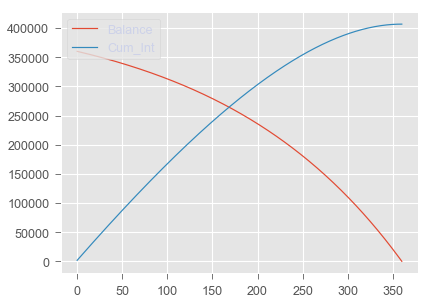

In [115]:
with plt.style.context('ggplot'):
    plt.plot(amort_table['Balance'])
    plt.plot(amort_table['Cum_Int'])
    plt.legend(loc=2)

## Amortization Application
Combine to evaluate different loan strategies or scenarios. 
1. Pay `extra_principal` to reduce the length of the loan

In [117]:
def amortize(pv, rate, term, extra_principal=0):
    ## 1. Initial set-up
    pmt = np.pmt(rate/12, term*12, -pv) ## monthly repayment
    ## Amortization Table
    amort_table = pd.DataFrame({'Balance': np.zeros(term*12+1),
                           'Interest': np.zeros(term*12+1),
                           'Principal': np.zeros(term*12+1),
                           'Cum_Int': np.zeros(term*12+1)})
    ## Fill in the table
    amort_table['Balance'][0] = pv
    amort_table['Interest'][0] = amort_table['Balance'][0]*rate/12 
    amort_table['Principal'][0] = pmt - amort_table['Interest'][0]
    amort_table['Cum_Int'] = amort_table['Interest'].cumsum()

    ## 2. Loops through the period
    for t in range(1, 360):
        actual_payment = pmt + extra_principal ## take into account extra_principal
        amort_table['Balance'][t] = max(0, ## to prevent it to be negative (not make sense)
                                        amort_table['Balance'][t-1] - amort_table['Principal'][t-1])
        amort_table['Interest'][t] = amort_table['Balance'][t] * rate/12
        amort_table['Principal'][t] = actual_payment - amort_table['Interest'][t]
        if amort_table['Balance'][t] < actual_payment:
            amort_table['Principal'][t] = amort_table['Balance'][t] ## in the last repayment, the principal repaid = balance
            break
    ## 3. Clean up the table
    amort_table = amort_table[amort_table['Balance'] != 0] ## remove all neg balance
    amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
    amort_table = round(amort_table, 2)
    ## 4. Summary output
    summary = pd.Series({
        'Interest': rate,
        'Monthly Payment': round(pmt, 2),
        'Extra Principal': extra_principal,
        'Total Interest': amort_table['Cum_Int'].max(),
        'Periods': amort_table.index[-1] + 1
    })
    return amort_table, summary

In [126]:
amort_table1, summary1 = amortize(pv, rate, term) ## Scenario 1
amort_table2, summary2 = amortize(pv, rate, term, extra_principal=100) ## Scenario 2
amort_table3, summary3 = amortize(pv, rate, term, extra_principal=200) ## Scenario 3
amort_table4, summary4 = amortize(pv, 0.0475, 15) ## Scenario 4

In [119]:
amort_table1.tail()

,Balance,Interest,Principal,Cum_Int
355,10493.06,51.37,2078.16,406529.69
356,8414.90,41.20,2088.34,406570.89
357,6326.56,30.97,2098.56,406601.87
358,4228.00,20.70,2108.84,406622.57
359,2119.16,10.38,2119.16,406632.94


In [127]:
scenarios = pd.DataFrame([summary1, summary2, summary3, summary4])
scenarios.index = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']
scenarios

,Interest,Monthly Payment,Extra Principal,Total Interest,Periods
Scenario 1,0.05875,2129.54,0.0,406632.94,360.0
Scenario 2,0.05875,2129.54,100.0,353965.30,321.0
Scenario 3,0.05875,2129.54,200.0,314600.69,290.0
Scenario 4,0.04750,2800.19,0.0,144035.08,180.0
